<a href="https://colab.research.google.com/github/LuJam2021/Python_Learning_History/blob/main/20211002_ETF%E7%B8%BE%E6%95%88%E5%88%86%E6%9E%90%26%E7%88%AC%E5%8D%83%E5%BC%B5%E5%A4%A7%E6%88%B6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ETF 績效分析

## 抓取ETF&整理 全球ETF

https://www.moneydj.com/etf/eb/ET305001list.djhtm


In [ ]:
import pandas as pd
url="https://www.moneydj.com/etf/eb/ET305001list.djhtm"

In [ ]:
df=pd.read_html(url,header=0)

In [ ]:
dfs_222=df[1]
dfs_222.head(3)

,代碼,ETF名稱,日期,幣別,報酬率(%),報酬率(%).1,報酬率(%).2,報酬率(%).3,報酬率(%).4,報酬率(%).5,報酬率(%).6,報酬率(%).7,報酬率(%).8,報酬率(%).9,報酬率(%).10
0,代碼,ETF名稱,日期,幣別,一日,一週,今年以來,一個月,三個月,六個月,一年,二年,三年,五年,十年
1,ZSL,ProShares二倍放空白銀ETF,10/01,美元,-3.42,-2.41,9.16,12.49,27.55,11.11,-20.03,-73.98,-82.35,-73.68,-82.52
2,ZROZ,PIMCO 25年期以上零息美國公債指數ETF,10/01,美元,0.69,-1.97,-9.52,-3.42,1.36,9.45,-13.44,5.07,45.73,23.03,74.12


### 3333策略

三個月、六個月、一年、三年 績效都在排名1/3以內

In [ ]:
dfs_222.columns

Index(['代碼', 'ETF名稱', '日期', '幣別', '報酬率(%)', '報酬率(%).1', '報酬率(%).2', '報酬率(%).3',
       '報酬率(%).4', '報酬率(%).5', '報酬率(%).6', '報酬率(%).7', '報酬率(%).8', '報酬率(%).9',
       '報酬率(%).10'],
      dtype='object')

In [ ]:
dfs_222.columns=dfs_222.iloc[0]


In [ ]:
dfs_222

,代碼,ETF名稱,日期,幣別,一日,一週,今年以來,一個月,三個月,六個月,一年,二年,三年,五年,十年
0,代碼,ETF名稱,日期,幣別,一日,一週,今年以來,一個月,三個月,六個月,一年,二年,三年,五年,十年
1,ZSL,ProShares二倍放空白銀ETF,10/01,美元,-3.42,-2.41,9.16,12.49,27.55,11.11,-20.03,-73.98,-82.35,-73.68,-82.52
2,ZROZ,PIMCO 25年期以上零息美國公債指數ETF,10/01,美元,0.69,-1.97,-9.52,-3.42,1.36,9.45,-13.44,5.07,45.73,23.03,74.12
3,ZIG,收購者基金ETF,10/01,美元,-0.20,-1.29,20.89,-4.26,2.63,9.02,26.72,15.41,NaN,NaN,NaN
4,ZHDG,ZEGA買入對沖主動型ETF,10/01,美元,0.40,-1.48,0.83,-2.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,9173,Premia中證財新中國新經濟 ETF,09/30,美元,2.01,1.06,-2.18,0.39,-8.62,3.39,13.37,65.87,NaN,NaN,NaN
2667,9167,工銀南方東英標普中國新經濟行業ETF,09/30,美元,-0.46,0.66,-22.21,-1.92,-21.06,-19.40,-7.98,25.97,26.86,NaN,NaN
2668,9151,Premia中國科創 50 ETF,09/30,美元,1.49,0.59,-8.33,-6.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2669,9141,華夏亞洲美元投資等級債券ETF,09/30,美元,-0.10,-0.95,-2.62,-0.86,-0.38,-0.10,-2.26,1.37,NaN,NaN,NaN


In [ ]:
#刪除第一行
#dfs_222=dfs_222.drop(index=0)

In [ ]:
dfs_222.sort_values('三個月',ascending=False).head(total//3)['代碼']

0         代碼
2195    DPST
1830    FLRU
2461    BNKU
2289     DBE
        ... 
1569    HYDW
946      PAB
1128    LQDB
1883    FISR
327     TPSC
Name: 代碼, Length: 890, dtype: object

In [ ]:
total=2670
target1=set(dfs_222.sort_values('三個月',ascending=False).head(total//3)['代碼'])
target2=set(dfs_222.sort_values('六個月',ascending=False).head(total//3)['代碼'])
target3=set(dfs_222.sort_values('一年',ascending=False).head(total//3)['代碼'])
target4=set(dfs_222.sort_values('三年',ascending=False).head(total//3)['代碼'])


In [ ]:
target=target1 & target2 & target3 & target4
target

{'AIEQ',
 'AUSF',
 'BOUT',
 'CANE',
 'CAPE',
 'CATH',
 'CDC',
 'CDL',
 'CFA',
 'CFO',
 'CHIM',
 'COWZ',
 'CURE',
 'DDIV',
 'DEUS',
 'DFND',
 'DFNL',
 'DIVB',
 'DSI',
 'EDOG',
 'EIRL',
 'ENOR',
 'EPS',
 'EQL',
 'EUFN',
 'EVX',
 'EWN',
 'EZM',
 'FDHY',
 'FIW',
 'FNK',
 'FXL',
 'FXO',
 'GSEW',
 'GVAL',
 'IAT',
 'IEFN',
 'ITOT',
 'IWV',
 'JHML',
 'JHMT',
 'JJS',
 'JO',
 'LEGR',
 'MAGA',
 'MOO',
 'NIB',
 'NORW',
 'NUMV',
 'OBOR',
 'PKW',
 'PSP',
 'QARP',
 'QDIV',
 'QDYN',
 'RSP',
 'RYT',
 'SCHB',
 'SGG',
 'SHE',
 'SKYY',
 'SLT',
 'SNSR',
 'SPTM',
 'SQLV',
 'SUSA',
 'TDIV',
 'UBOT',
 'UNL',
 'VO',
 'VTHR',
 'VTI',
 'WOMN',
 'XSLV',
 'XSVM',
 'XSW',
 '代碼'}

In [ ]:
dfs_222_3=dfs_222[dfs_222['代碼'].isin(target)]
dfs_222_3.sort_values(['六個月','三個月','一年','三年'],ascending=False).head(20)

,代碼,ETF名稱,日期,幣別,一日,一週,今年以來,一個月,三個月,六個月,一年,二年,三年,五年,十年
0,代碼,ETF名稱,日期,幣別,一日,一週,今年以來,一個月,三個月,六個月,一年,二年,三年,五年,十年
304,UBOT,Direxion每日二倍做多機器人、人工智慧與自動化指數ETF,10/01,美元,-1.98,-13.51,13.63,-6.77,6.61,9.95,95.68,242.86,75.76,NaN,NaN
2187,DSI,iShares MSCI社會責任ETF,10/01,美元,1.50,-2.25,19.01,-3.37,1.73,9.78,32.63,58.60,64.56,125.41,359.81
405,SUSA,iShares MSCI美國ESG精選ETF,10/01,美元,1.08,-2.77,18.75,-4.19,1.33,9.76,32.71,63.36,68.54,129.73,350.52
1545,IAT,iShares美國地區性銀行ETF,10/01,美元,2.36,3.94,38.52,7.73,7.03,9.58,92.56,44.97,38.58,98.51,323.56
2393,CAPE,iPath Shiller CAPE指數ETN,10/01,美元,0.81,-1.94,19.26,-4.41,1.00,9.53,36.61,56.59,59.59,129.70,NaN
2362,CHIM,Global X MSCI中國原物料類股ETF,10/01,美元,-0.83,-5.71,19.59,-8.78,7.26,9.44,45.13,88.96,63.04,118.75,109.07
2391,CATH,Global X標普500天主教價值股ETF,10/01,美元,0.65,-2.20,17.97,-3.81,1.25,9.42,32.08,54.39,57.70,121.66,NaN
1466,IEFN,iShares進化美國金融類股主動型ETF,10/01,美元,1.48,0.27,29.00,0.77,3.06,9.37,61.69,42.02,42.00,NaN,NaN
1879,FIW,First Trust水資源ETF,10/01,美元,0.90,-3.13,19.47,-5.51,2.42,9.08,42.31,57.96,73.06,135.83,396.62


# 分點查詢

## 持股分級

* 17筆資料 
1. 1-15 持股分級

  1=1張以下

  2=1-5張

  3=5-10張 

  4=10-15張 
  
  5=15-20張 
  
  6=20-30張 
  
  7=30-40張
  
  8=40張-50張 
  
  9=50張-100張 
  
  10=100張-200張 
  
  11=200張-400張 
  
  12=400張-600張
  
  13=600張-800張 
  
  14=800張-1000張 
  
  15=1000張以上

  16=差異數調整 
  
  17=合計

2. 16 差異數調整

3. 17 合計

網站 

https://smart.tdcc.com.tw/opendata/getOD.ashx?id=1-5

In [ ]:
import pandas as pd
import pandas_datareader.data as web
import requests
from bs4 import BeautifulSoup
#url="https://smart.tdcc.com.tw/opendata/getOD.ashx?id=1-5"
url="https://www.tdcc.com.tw/smWeb/QryStockAjax.do"

In [ ]:
headers = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.77 Safari/537.36'}
#session=requests.Session()


In [ ]:
data2={
    'scaDates':'20211001',
    'scaDate':'20211001',
    'SqlMethod':'StockNo',
    'StockNo':'3707',
    'radioStockNo':'3707',
    'StockName':'',
    'REQ_OPR':'SELECT',
    'clkStockNo':'3707',
    'clkStockName':'',
}

In [ ]:
data3={'REQ_OPR':'qrySelScaDates'}

In [ ]:
datelist=[
      '20211008','20211001',
      '20210924','20210917','20210911','20210903',
      '20210827','20210820','20210813','20210806',
      '20210730','20210723','20210716','20210709','20210702',
      '20210625','20210618','20210611','20210604',
      '20210528','20210521','20210514','20210507',
      '20210429','20210423','20210416','20210409','20210401',
      '20210326','20210319','20210312','20210305',
      '20210226','20210220','20210209','20210205',
      '20210129','20210122','20210115','20210108',
      '20201231','20201225','20201218','20201211','20201204',
      '20201127','20201120','20201113','20201106',
      '20201030','20201023','20201016','20201008'
      ]


In [ ]:
session=requests.Session()
s=session.post(url,data=data3,headers=headers)
df=pd.read_html(s.text)

ValueError: ignored

In [ ]:
df

[                                                    0  ...             4
 0                                          集保戶股權分散表查詢  ...           NaN
 1                                                查詢方式  ...           NaN
 2                                                 NaN  ...           NaN
 3                                                證券代號  ...           NaN
 4                                                證券名稱  ...           NaN
 5   若有多檔證券查詢需求，可至「本公司官網 －＞ 下載專區 －＞ 開放資料專區－＞ 股務資訊 －...  ...           NaN
 6                                                 NaN  ...           NaN
 7                                            集保戶股權分散表  ...           NaN
 8                                         證券代號： 證券名稱：  ...           NaN
 9                                                   序  ...  占集保庫存數比例 (%)
 10                                               無此資料  ...          無此資料
 11                                                說明：  ...           NaN
 12                                   

In [ ]:
dftotal=pd.DataFrame()
session=requests.Session()
session.headers = headers
for i in datelist:
  data2['scaDates']=i
  data2['scaDate']=i
  s=session.post(url,data=data2,headers=headers)
  df=pd.read_html(s.text,skiprows=9)
  dfs=df[0]
  dfs.columns=dfs.iloc[0] #轉換
  dfs.drop(dfs.head(1).index,inplace=True) #去頭
  dfs.reset_index(drop=True)#重置index
  dfs.drop(dfs.tail(5).index,inplace=True) #去尾
  dftotal=dftotal.append(dfs,ignore_index=True) #新增

In [ ]:
df=pd.read_html(s.text,skiprows=9)->list()

In [ ]:
dftotal[dftotal['序']=='15'].reset_index(drop=True)

,序,持股/單位數分級,人 數,股 數/單位數,占集保庫存數比例 (%)
0,15,"1,000,001以上",38,153092013,47.33
1,15,"1,000,001以上",43,165349971,51.15
2,15,"1,000,001以上",38,146790271,45.41
3,15,"1,000,001以上",45,156271391,48.34
4,15,"1,000,001以上",42,152618325,47.21
5,15,"1,000,001以上",44,159007013,49.19
6,15,"1,000,001以上",44,162125356,50.35
7,15,"1,000,001以上",41,155210002,49.21
8,15,"1,000,001以上",43,156716239,49.79
9,15,"1,000,001以上",44,159064069,50.53


In [ ]:
s=session.post(url,data=data2,headers=headers)
df=pd.read_html(s.text,skiprows=8)
df[0]
df[0].iloc[0][0]

'證券代號：3707 證券名稱：漢磊'

In [ ]:
for i in range(len(dftotal)):
 dftotal['股 數/單位數'][i]=dftotal['股 數/單位數'][i][:-3]
dftotal

TypeError: ignored

In [ ]:
df1=dftotal[dftotal['序']=='15'].reset_index()
df1['index']=datelist
df1.rename(columns={'index':'date'},inplace=True)
df1.head(2)

,date,序,持股/單位數分級,人 數,股 數/單位數,占集保庫存數比例 (%)
0,2021-10-1,15,"1,000,001以上",38,153092013,47.33
1,2021-9-24,15,"1,000,001以上",43,165349971,51.15


In [ ]:
 for i in range(len(df1['股 數/單位數'])):
   df1['股 數/單位數'][i]=int(df1['股 數/單位數'][i])//1000

df1['股 數/單位數']

0     153092
1     165349
2     146790
3     156271
4     152618
5     159007
6     162125
7     155210
8     156716
9     159064
10    161967
11    158181
12    153185
13    155436
14    160029
15    155719
16    146715
17    148135
18    134123
19    134553
20    126728
21    126875
22    126682
23    128218
24    141127
25    142507
26    141027
27    138510
28    130529
29    119431
30    113352
31    112986
32    121021
33    123448
34    123936
35    124280
36    126942
37    127566
38    120842
39    119252
40    116693
41    114696
42    117074
43    109844
44    103801
45    101261
46    101357
47     99753
48    101510
49    101000
50    100443
51     99638
Name: 股 數/單位數, dtype: object

In [ ]:
df1

,date,序,持股/單位數分級,人 數,股 數/單位數,占集保庫存數比例 (%)
0,20211001,15,"1,000,001以上",38,153092,47.33
1,20210924,15,"1,000,001以上",43,165349,51.15
2,20210917,15,"1,000,001以上",38,146790,45.41
3,20210911,15,"1,000,001以上",45,156271,48.34
4,20210903,15,"1,000,001以上",42,152618,47.21
5,20210827,15,"1,000,001以上",44,159007,49.19
6,20210820,15,"1,000,001以上",44,162125,50.35
7,20210813,15,"1,000,001以上",41,155210,49.21
8,20210806,15,"1,000,001以上",43,156716,49.79
9,20210730,15,"1,000,001以上",44,159064,50.53


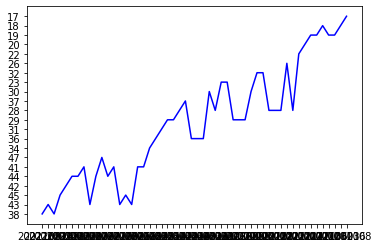

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x=df1['date']
y=df1['人 數']
z=df1['占集保庫存數比例 (%)']
plt.plot(x,y,'b-')

## 轉日期

In [ ]:
from datetime import datetime

for i in range(len(datelist)):
   d=datetime.strptime(datelist[i], "%Y%m%d")
   d=str(d.year)+'-'+str(d.month)+'-'+str(d.day)
   datelist[i]=d


str

In [ ]:
datelist

['2021-10-1',
 '2021-9-24',
 '2021-9-17',
 '2021-9-11',
 '2021-9-3',
 '2021-8-27',
 '2021-8-20',
 '2021-8-13',
 '2021-8-6',
 '2021-7-30',
 '2021-7-23',
 '2021-7-16',
 '2021-7-9',
 '2021-7-2',
 '2021-6-25',
 '2021-6-18',
 '2021-6-11',
 '2021-6-4',
 '2021-5-28',
 '2021-5-21',
 '2021-5-14',
 '2021-5-7',
 '2021-4-29',
 '2021-4-23',
 '2021-4-16',
 '2021-4-9',
 '2021-4-1',
 '2021-3-26',
 '2021-3-19',
 '2021-3-12',
 '2021-3-5',
 '2021-2-26',
 '2021-2-20',
 '2021-2-9',
 '2021-2-5',
 '2021-1-29',
 '2021-1-22',
 '2021-1-15',
 '2021-1-8',
 '2020-12-31',
 '2020-12-25',
 '2020-12-18',
 '2020-12-11',
 '2020-12-4',
 '2020-11-27',
 '2020-11-20',
 '2020-11-13',
 '2020-11-6',
 '2020-10-30',
 '2020-10-23',
 '2020-10-16',
 '2020-10-8']

In [ ]:
df1['date']=datelist
df1

NameError: ignored

In [ ]:
import plotly.express as px

fig = px.line(df1, x='date', y="人 數", title='Life expectancy in Canada')
fig.show()

# 上市發行ETF清單

https://www.twse.com.tw/zh/ETF/list


In [ ]:
import pandas as pd
url="https://www.twse.com.tw/zh/ETF/list"

In [ ]:
df=pd.read_html(url)
df[0]

,上市日期,證券代號,證券簡稱,發行人,標的指數
0,2003.06.30,0050,元大台灣50,元大證券投資信託股份有限公司,富時臺灣證券交易所臺灣50指數
1,2006.08.31,0051,元大中型100,元大證券投資信託股份有限公司,臺灣中型100指數
2,2006.09.12,0052,富邦科技,富邦證券投資信託股份有限公司,臺灣證券交易所臺灣資訊科技指數
3,2007.07.16,0053,元大電子,元大證券投資信託股份有限公司,電子類加權股價指數
4,2007.07.16,0054,元大台商50,元大證券投資信託股份有限公司,S&P台商收成指數
...,...,...,...,...,...
120,2021.07.01,00893,國泰智能電動車,國泰證券投資信託股份有限公司,ICE FactSet 全球智能電動車指數
121,2021.08.12,00895,富邦未來車,富邦證券投資信託股份有限公司,MSCI ACWI IMI精選未來車30指數
122,2021.08.13,00894,中信小資高價30,中國信託證券投資信託股份有限公司,臺灣指數公司特選小資高價30指數
123,2021.09.16,00896,中信綠能及電動車(本基金非屬環境、社會及治理相關主題基金),中國信託證券投資信託股份有限公司,臺灣指數公司特選臺灣上市上櫃綠能及電動車指數


#使用工具紀錄一

```python

pd.read(url,skiprows=1,header=0)
s=requests.post(url,data=data2,headers=headers)
s=session.post(url,data=data2,headers=headers)
dfs_222.sort_values('123',ascending=False)#降冪
ds.drop('123',axis=1) #x,y軸
ds.drop(ds.head(1).index,inplace=True) #drop頭
ds.drop(ds.tail(1).index,inplace=True) #drop尾
dfs.reset_index(drop=True) #重置index drop=True覆蓋原index
dfs=dfs[dfs['123'].isin(target)]



# 使用工具紀錄二

reponse=post(url,data=form_data,headers=headers)

屬性|	說明
response.text	|獲取響應文字

response.content|	獲取網頁上的二進位制圖片、視訊

response.encoding|	獲取網頁編碼

response.encoding=”utf-8”|	設定網頁編碼

response.status_code|	獲取響應狀態碼

response.headers|	獲取響應頭資訊

response.cookies	獲取cookies資訊

response.url|	獲取url資訊

response.history|	獲取history資訊


## POST登入

```python
import requests
session= requests.session()
url = 'https://www.douban.com/'
#1.輸入賬號和密碼
postdata = {
'username':'xxxxxx',
'password':'xxxxxx'
}
headers = {
'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/55.0.2883.95 Safari/537.36'}
response= session.post(url, data=postdata,headers=headers)
